In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

# Whenever we are looking for hotels for vacation or travel, we always prefer a hotel known for its services. The best way to find out whether a hotel is right for you or not is to find out what people are saying about the hotel who have stayed there before. Now it is very difficult to read the experience of each person who has given their opinion on the services of the hotel.

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/HP/hotel.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

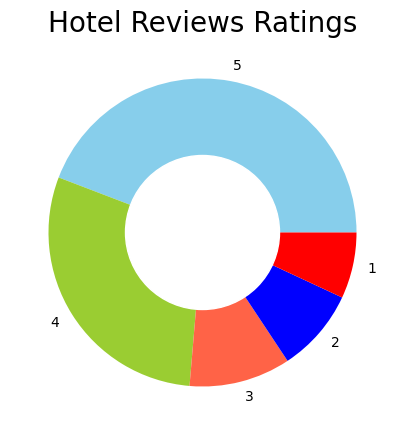

In [10]:
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5,5))
plt.pie(quantity, labels = numbers, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5,color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size = 12)
plt.title("Hotel Reviews Ratings",fontsize= 20)
plt.show()

# It can be seen that most of the guests rated the hotel services with 5 stars and 4 stars. So According to the above ratings, we can say that most fo the guests are satisfied with the services of the hotel they stayed. Now let's move forward by analyzing the sentiments of hotel reviews. To analyze the sentiment of the hotel reviews, I'll add three additional columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews.


In [11]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
print(df.head())

                                              Review  Rating  Positive  \
0  nice hotel expensive parking got good deal sta...       4     0.285   
1  ok nothing special charge diamond member hilto...       2     0.189   
2  nice rooms not 4* experience hotel monaco seat...       3     0.219   
3  unique, great stay, wonderful time hotel monac...       5     0.385   
4  great stay great stay, went seahawk game aweso...       5     0.221   

   Negative  Neutral  
0     0.072    0.643  
1     0.110    0.701  
2     0.081    0.700  
3     0.060    0.555  
4     0.135    0.643  


# According to the reviews, hotel guests seem satisfied with the services, now let's take at how most people think about hotel services based on the sentiment of their reviews:

In [13]:
x =sum(df["Positive"])
y =sum(df["Negative"])
z =sum(df["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positve😊 ")
    elif (b>a) and (b>c):
        print("Negative😞 ")
    else:
        print("Neutral")
sentiment_score(x,y,z)

Neutral


# Thus, most people feel neutral about the hotel services. Now let's take a closer look at sentiment scores.

In [14]:
pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/96/c6/0114b2040a96561fd1b44c75df749bbd3c898bf8047fb5ce8d7590d2dee6/emoji-2.8.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/358.9 kB ? eta -:--:--
   --- ------------------------------------ 30.7/358.9 kB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 92.2/358.9 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/358.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 256.0/358.9 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 327.7/358.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  358.4/358.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 358.9/358.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
print("Positive :",x)
print("Negative :",y)
print("Neutral :",z)

Positive : 6359.91000000002
Negative : 1473.4750000000038
Neutral : 12657.627999999937
